In [10]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import PIL
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        brightness_range = [0.5,1.5],
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        './data/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='sparse')

Found 2564 images belonging to 4 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        './data/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='sparse')

Found 399 images belonging to 4 classes.


In [6]:
model = Sequential()
#Block 1
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(MaxPool2D(pool_size=2, strides=2))
#Block 2
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
#Block 3
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [7]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="auto", name="sparse_categorical_crossentropy"), metrics = ['accuracy'])

In [13]:
history = model.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
81/81 [==============================] - 49s 599ms/step - loss: 0.3543 - accuracy: 0.8651 - val_loss: 0.2624 - val_accuracy: 0.9098
Epoch 2/30
81/81 [==============================] - 55s 676ms/step - loss: 0.3156 - accuracy: 0.8775 - val_loss: 0.2679 - val_accuracy: 0.8897
Epoch 3/30
81/81 [==============================] - 53s 658ms/step - loss: 0.3191 - accuracy: 0.8838 - val_loss: 0.2326 - val_accuracy: 0.9223
Epoch 4/30
81/81 [==============================] - 52s 643ms/step - loss: 0.3147 - accuracy: 0.8838 - val_loss: 0.2473 - val_accuracy: 0.9173
Epoch 5/30
81/81 [==============================] - 55s 681ms/step - loss: 0.3021 - accuracy: 0.8834 - val_loss: 0.2898 - val_accuracy: 0.8897
Epoch 6/30
81/81 [==============================] - 51s 629ms/step - loss: 0.3109 - accuracy: 0.8744 - val_loss: 0.1849 - val_accuracy: 0.9424
Epoch 7/30
81/81 [==============================] - 63s 776ms/step - loss: 0.2899 - accuracy: 0.8881 - val_loss: 0.1630 - val_accuracy: 0.9549

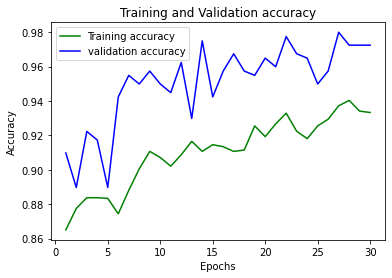

In [14]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

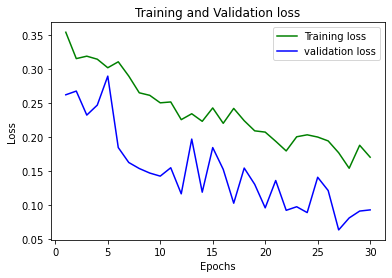

In [16]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
''''
model.save('./modelo/model.h5')
model.save_weights('./modelo/pesos.h5')
'''''